# A Project on Bank Personal Loans.

# Description

Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. 
Majority of these customers are liability customers (depositors) with varying size of deposits. 
The number of customers who are also borrowers (asset customers) is quite small, 
and the bank is interested in expanding this base rapidly to bring in more loan business 
and in the process, earn more through the interest on loans. In particular, 
the management wants to explore ways of converting its liability customers to 
personal loan customers (while retaining them as depositors). A campaign that the bank 
ran last year for liability customers showed a healthy conversion rate of over 9% success. 
This has encouraged the retail marketing department to devise campaigns with better target marketing 
to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers 
who have higher probability of purchasing the loan. This will increase the success ratio 
while at the same time reduce the cost of the campaign.
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), 
the customer's relationship with the bank (mortgage, securities account, etc.), 
and the customer response to the last personal loan campaign (Personal Loan). 
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

1.	Read the column description and ensure you understand each attribute well
2.	Study the data distribution in each attribute, share your findings (5 points)
3.	Get the target column distribution. Your comments
4.	Split the data into training and test set in the ratio of 70:30 respectively
5.	Use different classification models (Logistic, Linear) to predict the likelihood of 
    a liability customer buying personal loans. 
6.	Print the confusion matrix for all the above models. 
7. Give your reasoning on which is the best model in this case and why it performs better? 


In [ ]:
# Column descriptions

##	Data Description:								
##									
##	ID	Customer ID							
##	Age	Customer's age in completed years							
##	Experience	#years of professional experience							
##	Income	Annual income of the customer ($000)							
##	ZIPCode	Home Address ZIP code.							
##	Family	Family size of the customer							
##	CCAvg	Avg. spending on credit cards per month ($000)							
##	Education	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional							
##	Mortgage	Value of house mortgage if any. ($000)							
##	Personal Loan	Did this customer accept the personal loan offered in the last campaign?							
##	Securities Account	Does the customer have a securities account with the bank?							
##	CD Account	Does the customer have a certificate of deposit (CD) account with the bank?							
##	Online	Does the customer use internet banking facilities?							
##	CreditCard	Does the customer use a credit card issued by UniversalBank?							

In [2]:
# import required libraries for data analysis
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix  
import statsmodels.api as sm 
from sklearn import metrics

In [3]:
# import the Bank_Personal_Loan_ dataset
bank = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [3]:
# check first 10 records of Bank data. 
bank.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [4]:
# to know howmany rows and columns in the dataset
bank.shape

(5000, 14)

In [5]:
bank.dtypes # to see each attribure data type in the data

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [6]:
bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
#There are negative numbmers in experience! maybe typing error. 
# Convert to non-negative using .abs function

bank['Experience'] = bank['Experience'].abs()
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [8]:
# first check any null/missing values in the dataset
bank.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

   Personal_Loan  Percent
0           4520     90.4
1            480      9.6


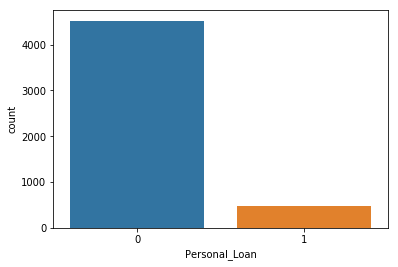

In [9]:
sns.countplot(x="Personal_Loan", data=bank)
print(pd.DataFrame({"Personal_Loan":bank["Personal_Loan"].value_counts(),
                          "Percent":round(bank["Personal_Loan"].value_counts(normalize=True),3)*100}))

In [10]:
print("Total no.of customers having personal loans:",bank["Personal_Loan"].sum())
print("The percentage is:",bank["Personal_Loan"].sum()/5000*100,"%")
print("out of 100% of the all customers in the bank there is only 9.6 % of the customers are having personal loans")

Total no.of customers having personal loans: 480
The percentage is: 9.6 %
out of 100% of the all customers in the bank there is only 9.6 % of the customers are having personal loans


C:\Users\Shukur SK\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


AxesSubplot(0.125,0.125;0.775x0.755)


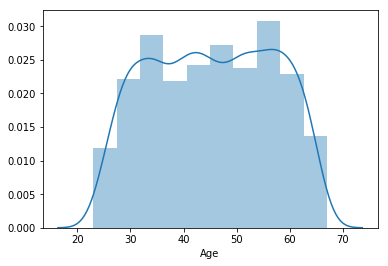

In [11]:
print(sns.distplot(bank["Age"],bins=(10)))

In [ ]:
# the Age attribute not normally distributed its look like a flat distribution
# and there is no sharpen of the peak
# and Standard Deviation also high

the Confidence Intervals of Age is: (44.032887904160525, 46.10369837920047)
AxesSubplot(0.125,0.125;0.775x0.755)
Inter Quartaile Range of personal loan customers 20.0


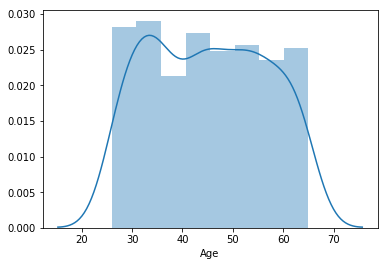

In [21]:
# lets see personal loan taken customers data
p_loan=bank[bank.Personal_Loan==1] # who has taken personal loans
b=p_loan["Age"] # personal loan customers age to check their Age Intervals
Age_ci=np.array(b) # convert the Age attribute into numpy array because confidence intervals calculated in the array format
el = sm.emplike.DescStat(Age_ci) # calculating array values into confidence intervals
print("the Confidence Intervals of Age is:",el.ci_mean()) # print confidence intervals
print(sns.distplot(b)) # personal loan customers Age distribution
IQR=b.quantile(0.75)-b.quantile(0.25) # Age Inter Quartaile Range of personal loan customers
print("Inter Quartaile Range of personal loan customers",IQR) 

# Personal loan avg Age is

The average of the Age of Personal Loan of customer is 45

If you try to know about Confidence Intervals of the Age from Lower to Higher Is from 44 to 46 

Why there is no that much change in CI compared with mean because the Age attributes having 11.6 
standard deviation away from the mean

Because the Age attribute is not Normally distributed

If you see distribution of the Age of default Personal loans costumers are having from 20% to 80% of 
the Age Data points falls into this range (20). So that I can say the avg customer Age is from 33 to 57 
falls into this range (20). So at nearly 12 SD of Age I can say the avg customer Age is from 33 to 57 



AxesSubplot(0.125,0.125;0.775x0.755)


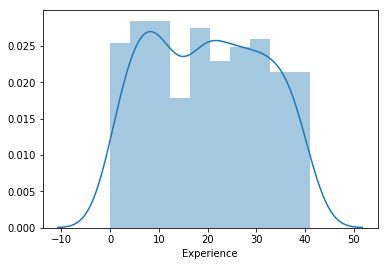

In [22]:
print(sns.distplot(p_loan["Experience"],bins=(10)))

In [ ]:
# most of the customers having 10-40 years of professional experience

AxesSubplot(0.125,0.125;0.775x0.755)


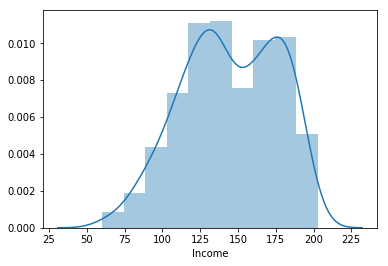

In [23]:
# Annual income of the customer ($000)
print(sns.distplot(p_loan["Income"],bins=(10)))

In [41]:
No_Personal_loan=bank[bank.Personal_Loan==0] # non perrsonal loan customers
Personal_loan=bank[bank.Personal_Loan==1] # personal loan customers
inc_diff=pd.DataFrame({"No_Personal_loan":No_Personal_loan["Income"],"Personal_loan":Personal_loan["Income"]})
inc_diff.agg(["mean","std"]).T # to find difference in the both categories

,mean,std
No_Personal_loan,66.237389,40.578534
Personal_loan,144.745833,31.584429


In [ ]:
# Personal_loan customers income is more then twice the non Personal_loan customers income
# so high income customers are tent to take Personal_loans
# Standard deviation also not that much vary in the both categories
# bank try to target on customers who is earning morethan or equel to 100 $ of anual income 

AxesSubplot(0.125,0.125;0.775x0.755)
3    0.43
2    0.38
1    0.19
Name: Education, dtype: float64


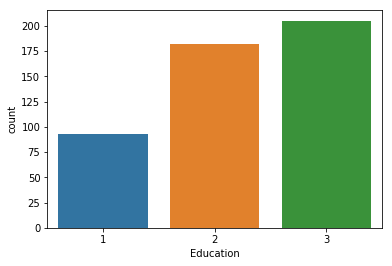

In [46]:
# the customers having personal loans and their Education
print(sns.countplot(x="Education",data=p_loan)) 
print(round(p_loan["Education"].value_counts(normalize=True),2))

In [ ]:
# the customers having personal loans their Education also gradually growing 
# so Educated people will probably fall into the taking Pesonal loans

AxesSubplot(0.125,0.125;0.775x0.755)


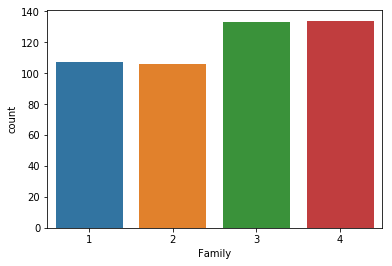

In [47]:
print(sns.countplot(x="Family",data=p_loan)) 

In [ ]:
# if the family size is increasing then personal loans also increasing because expencess also increasing
# so bank try to focus on customer family size

AxesSubplot(0.125,0.125;0.775x0.755)
0    0.7
1    0.3
Name: CreditCard, dtype: float64


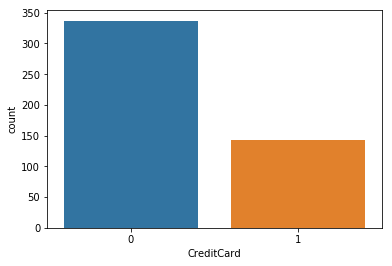

In [50]:
print(sns.countplot(x="CreditCard",data=p_loan)) 
print(round(p_loan["CreditCard"].value_counts(normalize=True),2))

In [ ]:
# only 30% of the Personal loan customers are having credit cards

In [58]:
#bank.groupby("Personal_Loan").mean()
p_loan.groupby("Personal_Loan").mean() # to see Average of each attribute in the personal loan taken customers

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
Personal_Loan,,,,,,,,,,,,,
1,2390.65,45.066667,19.84375,144.745833,93153.202083,2.6125,3.905354,2.233333,100.845833,0.125,0.291667,0.60625,0.297917


In [ ]:
# personal loan customers are having low credit cards,CD_Accounts and Securities_Accounts
# personal loan customers are having Online users, high income, CCAvg, Education and family size also big

# Correlation:

In [70]:
#sns.heatmap(bank.corr(),annot=True, linewidths=.5,center=0,cbar=False,cmap="YlGnBu")
#sns.pairplot(bank) 
bank.corr() # to check correlation with each attribute

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008202,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.993991,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008202,0.993991,1.000000,-0.046876,-0.028936,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.017695,-0.055269,-0.046876,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028936,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.051851,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049738,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013919,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.011097,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.024801,-0.007726,-0.008304,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [ ]:
# Age and experience have strong positive relation
# Age and income have no linear relationship
# Age and experience have no linear relationship

In [69]:
#  check all attributes having relationship with Personal_Loan attribute
pd.DataFrame(bank.corr().Personal_Loan.sort_values(ascending=False))

,Personal_Loan
Personal_Loan,1.000000
Income,0.502462
CCAvg,0.366889
CD_Account,0.316355
Mortgage,0.142095
Education,0.136722
Family,0.061367
Securities_Account,0.021954
Online,0.006278
CreditCard,0.002802


In [ ]:
# income having good relation with Personal_Loan

In [75]:
# sns.boxplot(bank["Personal_Loan"])
#sns.distplot(bank["Personal_Loan"]) # to check distribution
bank.groupby(["Personal_Loan"]).count()  #The data set is skewed in terms of target column.
# There are far few records in class 1 i.e. people who took the personal loan last time. But that 
# is the class of interst to us! We have to identify potential customers and do not want any potential
# customer to be missed. 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
Personal_Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


# Feature Selection

In [4]:
# Separate the independent attributes i.e. columns 0 to 8 and store them in X array
# Store the target column (column 8) into Y array

x=bank.drop(['ID','Personal_Loan', 'Experience', 'ZIP Code','Mortgage'], axis=1)
y=bank['Personal_Loan']

# Model Creation

In [ ]:
####### --------------------------- Logistic Model --------------------------------------

In [6]:
# Create the training and test data set in the ratio of 70:30 respectively. Can be any other ratio...
# Prepare data for logistic regression
#logistic modeling algorithm requires feature array not dataframe

X_train,x_test,Y_train,y_test= train_test_split(x,y, test_size=0.3, random_state=1)

In [8]:
model=LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\Shukur SK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
prd=model.predict(x_test)

In [10]:
confusion_matrix(y_test,prd)

array([[1337,   14],
       [  73,   76]], dtype=int64)

In [11]:
accuracy_score(y_test,prd)*100

94.19999999999999

In [12]:
# The accuracy score of .94 looks impressive but do not forget, it is unreliable as it is a score at
# model level. Let us look at class level, especially the class 1.

# summarize the fit of the model
print(metrics.classification_report(y_test,prd))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.84      0.51      0.64       149

   micro avg       0.94      0.94      0.94      1500
   macro avg       0.90      0.75      0.80      1500
weighted avg       0.94      0.94      0.94      1500



In [13]:
#The precision and recall for class 1 is low...

#Precision: Within a given set of positively-labeled results, the fraction that were 
#true positives = tp/(tp + fp) , this has to be calculated for each class i.e. 0 and 1 and should be
# high for the class less represented, class 1 in our example

#Recall: Given a set of positively-labeled results, the fraction of all positives that were 
#retrieved = tp/(tp + fn)

# Accuracy: tp + tn / (tp + tn + fp +fn) But this measure can be dominated by larger class. 
# Suppose 10, 90 and 80 of 90 is correctly predicted while only 2 of 0 is predicted correctly. 
# Accuracy is 80+2 / 100 i.e. 82%

# F is harmonic mean of precision and recal given by ((B^2 +1) PR) / (B^2P +R)
#When B is set to 1 we get F1 = 2PR / (P+R)

In [14]:
print(model.coef_)
print(x.columns)

[[-0.01842537  0.04149534  0.46705695  0.12935118  1.20287177 -0.93217096
   3.19120075 -0.61592924 -1.01723145]]
Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


In [ ]:
###### ----------------------- Naive Bayes Model ---------------------------------

In [15]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
N_model = GaussianNB()
N_model.fit(X_train, Y_train)

predictions=N_model.predict(x_test)

#Assess the accuracy of the model on test data
metrics.confusion_matrix(y_test,predictions)
print(accuracy_score(y_test,predictions)*100)
# summarize the fit of the model
print(metrics.classification_report(y_test, predictions))

88.66666666666667
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1351
           1       0.44      0.55      0.49       149

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.70      0.74      0.71      1500
weighted avg       0.90      0.89      0.89      1500



In [ ]:
## Naive Bayes also is not giving the class 1 metrics in the acceptal range (80% and above). Let us try
## K Nearest Neighbours

In [16]:
#####  ------------------------------ K Nearest Neighbours ------------------------------------

In [17]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')
NNH.fit(X_train, Y_train)
predicted_labels = NNH.predict(x_test)
print(metrics.confusion_matrix(y_test, predicted_labels))
print(metrics.classification_report(y_test, predicted_labels))

[[1328   23]
 [  74   75]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1351
           1       0.77      0.50      0.61       149

   micro avg       0.94      0.94      0.94      1500
   macro avg       0.86      0.74      0.79      1500
weighted avg       0.93      0.94      0.93      1500



In [18]:
### Recall (true positives / (true positives + false negatives)) for class 1 is the low. That is 
### because majority of data points belong to class 0 and in KNN, probability of finding data points
### from class 0 closer to a test point than a data point from class 1 is high.

In [19]:
### let us check the effect of scaling (convert all dimensions to z scores)
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(x_test)
NNH.fit(X_train_scaled, Y_train)

predicted_labels = NNH.predict(X_test_scaled)
metrics.confusion_matrix(y_test, predicted_labels)
print(accuracy_score(y_test, predicted_labels)*100)
print(metrics.classification_report(y_test, predicted_labels))

C:\Users\Shukur SK\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Shukur SK\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


96.46666666666667
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1351
           1       0.95      0.68      0.79       149

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.96      0.84      0.89      1500
weighted avg       0.96      0.96      0.96      1500



In [20]:
## scaled KNN algorithm gives the best result for class 1 till now. Let us check decision tree

In [21]:
#####  ------------------------------ Decision Tree ------------------------------------

In [22]:
model_entropy=DecisionTreeClassifier(criterion="entropy")
model_entropy.fit(X_train,Y_train)
prd=model_entropy.predict(x_test)
confusion_matrix(y_test,prd)
print(model_entropy.score(x_test,y_test))
print(metrics.classification_report(y_test, prd))

0.9793333333333333
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1351
           1       0.93      0.86      0.89       149

   micro avg       0.98      0.98      0.98      1500
   macro avg       0.96      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500



In [102]:
## Decision Tree algorithm gives the great result for class 1 abow 80% . 
## Decision Tree model given better performance compared with other model till now.
## so that we can go along with Decision Tree model

In [ ]:
# Suggesions

* Focusing on customer family size that helps to increase sales of Personal Loan department
  if the famiy size is increase they tent to fall in Personal Loans.
* High Educated peoples are taken Personal Loans compared with Undergrad people, so, bank has to focuse on Educated peoples.
* customer income plays a vital role in personal loans. low income cusomers tent to take personal loans.
* the customers who are using internet banking they half of them also using credit cards. so, to increase credit card sales 
  focus on online users.
    
